In [1]:
#meta 5/31/2021 Google I/O TFHub Example - Birds Image Classifier
#How to take a model from TFHub and use it directly in a project
#origin: 
#Session: TensorFlow Hub for Real World Impact  5/19/2021
#example: Birds image classifire, w/ pretrained model
#ref
#TFHub image classification: aiy/vision/classifier/birds_V1
#https://tfhub.dev/google/aiy/vision/classifier/birds_V1/1
#labelmap (https://www.gstatic.com/aihub/tfhub/labelmaps/aiy_birds_V1_labelmap.csv)

#input: random images of random birds 
#output: image_classifier: A probability vector of dimension 965, corresponding to a background class and 964 bird species in the labelmap. 

#history
#5/31/2021 IMAGE CLASSIFIER w/PRETRAINED MODEL
#     Google I/O example
#     https://events.google.com/io/session/d39de9e5-e54f-48eb-acf7-5a5a35a2cb3e?utm_medium=referral&utm_campaign=io21-resources&lng=en 
#     Birds image classifier w/ pretrained model

#more ref
# Bird_Classifier_Tensorflow_Colab_notebook
#https://github.com/LaurentVeyssier/Bird_Classifier_Tensorflow_Colab_Notebook/blob/master/BirdClassifier.ipynb

# TFHub Example - Bird Image Classifier
Birds image classification developed in tensorflow using pre-trained model from Tensorflow Hub  
Example: How to take a model from TFHub and use it directly in a project.  

The model takes RGB images as input and predicts the bird type out of 964 different species.

Refer to https://tfhub.dev/google/aiy/vision/classifier/birds_V1/1  

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf # TF2 version
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
#print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.4.1
Hub version: 0.12.0


In [3]:
#constants
DIR_IMAGES = '../input/adorable-cat/'
BATCH_SIZE = 2 #$note: errors out in iterator
IMAGE_RES = 224 # input dimensions required by the CNN model

In [4]:
#functions

#my transform from an RGB image to tensor
def parse_image(file_path):
    image_string = tf.io.read_file(file_path)
    image_decoded = tf.image.decode_jpeg(image_string, channels=3)
    #resize ref https://www.tensorflow.org/api_docs/python/tf/image/resize
    image = tf.image.resize(image_decoded, (IMAGE_RES,IMAGE_RES)) #, method='nearest'
    #normalize 
    image = image/255.0
    image = tf.cast(image, tf.float32)
    return image

# transform from an RGB image to tensor, with image display
# src https://github.com/LaurentVeyssier/Bird_Classifier_Tensorflow_Colab_Notebook/blob/master/BirdClassifier.ipynb
from keras.preprocessing import image 
def preprocess_image_to_tensor(img_path, ax):
    img = image.load_img(img_path, target_size=(IMAGE_RES, IMAGE_RES))          # loads RGB image as PIL.Image.Image type, resize image to model input dimensions
    ax.imshow(img, alpha=1)
    x = image.img_to_array(img)/255.0                                           # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3) and normalize to [0:1] as per model requierements
    x = np.expand_dims(x, axis=0)                                               # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return x                                                                    # return 4D tensor


## 0. Input Data
Random images of random birds 

In [5]:
# Input data files are available in the read-only "../input/" directory
# list all files under the input directory
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/adorable-cat/adorable_cat.jpg
/kaggle/input/adorable-cat/bird2.jpeg
/kaggle/input/adorable-cat/bird3.jpeg
/kaggle/input/adorable-cat/bird1.jpeg
/kaggle/input/adorable-cat/bird4.jpeg


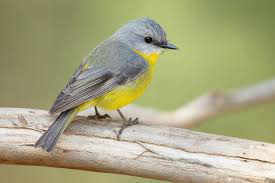

In [6]:
#view an image example
im1 = Image.open(DIR_IMAGES + '/' + filenames[1]) #.resize((IMAGE_RES, IMAGE_RES))
im1

In [7]:
#full path to images
filepaths = []
[filepaths.append(DIR_IMAGES + x) for x in filenames[1:]]
filepaths

['../input/adorable-cat/bird2.jpeg',
 '../input/adorable-cat/bird3.jpeg',
 '../input/adorable-cat/bird1.jpeg',
 '../input/adorable-cat/bird4.jpeg']

## 1. Transform Image(s)

In [8]:
#my transform example 
im1_tensor = parse_image(filepaths[0])
im1_tensor.shape

TensorShape([224, 224, 3])

array([[[[0.5019608 , 0.49411765, 0.33333334],
         [0.5019608 , 0.49411765, 0.33333334],
         [0.5058824 , 0.49803922, 0.3372549 ],
         ...,
         [0.45490196, 0.5058824 , 0.29411766],
         [0.44705883, 0.49803922, 0.28627452],
         [0.44705883, 0.49803922, 0.28627452]],

        [[0.49803922, 0.49019608, 0.32941177],
         [0.5019608 , 0.49411765, 0.33333334],
         [0.5058824 , 0.49803922, 0.3372549 ],
         ...,
         [0.45490196, 0.5058824 , 0.29411766],
         [0.44705883, 0.49803922, 0.28627452],
         [0.44705883, 0.49803922, 0.28627452]],

        [[0.49803922, 0.49019608, 0.32941177],
         [0.49803922, 0.49019608, 0.32941177],
         [0.5058824 , 0.49803922, 0.3372549 ],
         ...,
         [0.45490196, 0.5058824 , 0.29411766],
         [0.44705883, 0.49803922, 0.28627452],
         [0.44705883, 0.49803922, 0.28627452]],

        ...,

        [[0.5882353 , 0.54509807, 0.36862746],
         [0.5882353 , 0.54509807, 0.36862746]

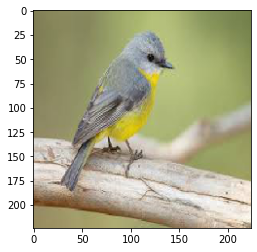

In [9]:
#transform example with image display
processed_image=preprocess_image_to_tensor(filepaths[0], plt)
processed_image

In [10]:
#transform all images
images = []
[images.append(parse_image(x)) for x in filepaths]

len(images), images[0]

(4,
 <tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.49019608, 0.49411765, 0.32156864],
         [0.49153537, 0.49545693, 0.3229079 ],
         [0.4963498 , 0.5002714 , 0.32772234],
         ...,
         [0.44591233, 0.5047358 , 0.28904957],
         [0.4392157 , 0.49803922, 0.28235295],
         [0.4392157 , 0.49803922, 0.28235295]],
 
        [[0.49019608, 0.49411765, 0.32156864],
         [0.49153537, 0.49545693, 0.3229079 ],
         [0.4963498 , 0.5002714 , 0.32772234],
         ...,
         [0.44591233, 0.5047358 , 0.28904957],
         [0.4392157 , 0.49803922, 0.28235295],
         [0.4392157 , 0.49803922, 0.28235295]],
 
        [[0.49019608, 0.49411765, 0.32156864],
         [0.4908089 , 0.49473047, 0.32218146],
         [0.4942227 , 0.49814427, 0.32559523],
         ...,
         [0.44591233, 0.5047358 , 0.28904957],
         [0.4392157 , 0.49803922, 0.28235295],
         [0.4392157 , 0.49803922, 0.28235295]],
 
        ...,
 
        [[0.5803922 , 0.5490

## 2. Load Pretrained Model

In [11]:
#load the Bird classifier model from TFHub
URL = 'https://tfhub.dev/google/aiy/vision/classifier/birds_V1/1'
classify = hub.KerasLayer(URL, input_shape=(IMAGE_RES,IMAGE_RES,3))

## 3. Classify Images
- Input  
This model takes input of images.  Inputs are expected to be 3-channel RGB color images of size 224 x 224, scaled to [0, 1].  

- Output  
This model outputs to image_classifier: A probability vector of dimension 965, corresponding to a background class and 964 bird species in the labelmap. (https://www.gstatic.com/aihub/tfhub/labelmaps/aiy_birds_V1_labelmap.csv)


In [12]:
class_probabilities = classify(np.array(images)) #$fix: with np.array around list of images
class_probabilities

<tf.Tensor: shape=(4, 965), dtype=float32, numpy=
array([[5.4308337e-05, 2.2058917e-04, 5.9328997e-04, ..., 4.2661835e-04,
        1.2386132e-04, 2.8249118e-04],
       [1.4076355e-05, 3.8086166e-04, 3.2296349e-04, ..., 4.1113115e-05,
        4.8483533e-05, 1.2079923e-03],
       [1.7300417e-04, 8.2374827e-05, 6.4324071e-05, ..., 1.3509399e-04,
        9.7142285e-05, 3.3458939e-04],
       [9.3415554e-05, 6.2226935e-04, 4.4479173e-05, ..., 1.2991128e-04,
        1.1962996e-04, 1.2991128e-04]], dtype=float32)>

In [14]:
class_ids = tf.argmax(class_probabilities, axis=1)
print(class_ids) #class tensorflow.python.framework.ops.EagerTensor

tf.Tensor([252 630   3 520], shape=(4,), dtype=int64)


In [15]:
y_hat = tf.squeeze(class_ids).numpy()
y_hat

array([252, 630,   3, 520])

### 3.1 Classify Images w/Display

Classify images:  4


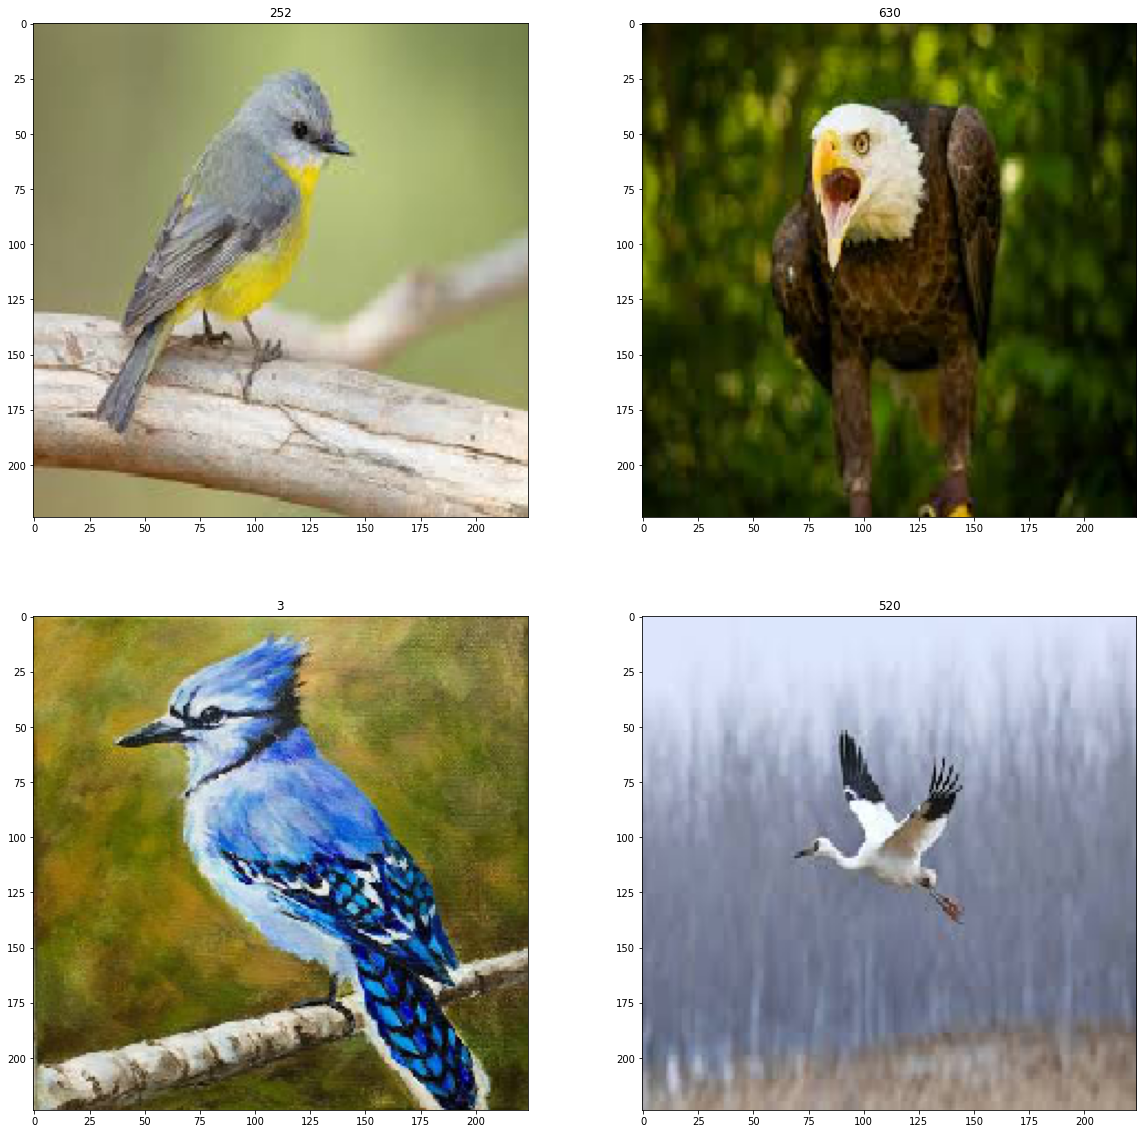

In [16]:
num_img=len(filepaths)
print ('Classify images: ', num_img)
lines= 2
columns=np.minimum(2,num_img)

plt.figure(figsize=(20, 20))
for index, file in enumerate(filepaths):
  ax=plt.subplot(lines, columns,index+1)
  processed_image=preprocess_image_to_tensor(file, ax)                          # preprocess_image_to_tensor preprocess image before feeding to classifier
  output = classify(processed_image)                                       # get prediction
  prediction = np.argmax(tf.squeeze(output).numpy())
  plt.title(prediction)
plt.show()

Next step would be comparing actual label to prediction (not in scope for time-sake). Looked up classes (manually) in labelmap:  
252. Tyrannus couchii -> Couch's kingsbird  
630. Haliaeetus leucocephalus -> bald eagle  
3. Cyanocitta cristata -> blue jay  
520. Mycteria americana -> wood stork

I am not a bird expert but predictions look good!  Thank you TFHub.

## Xtra

In [ ]:
mystop

In [ ]:
#$xtra images in batches
#--
images_ds = tf.data.Dataset.from_tensor_slices(filepaths)
images_ds = images_ds.map(parse_image).batch(BATCH_SIZE)
images_ds.take(1) #tensorflow.python.data.ops.dataset_ops.BatchDataset

#--
STEP_NUM = 2 #$ac changing this number breaks model inference, $todo: figure out why
test_iter = iter(images_ds)

images = []
for im in range(STEP_NUM):
    input, output = test_iter.get_next()
    #input, output #class tensorflow.python.framework.ops.EagerTensor
    
    images.append(input)
    
len(images)

In [ ]:
#$xtra quick hardcode a few images
#filepaths = tf.constant([DIR_IMAGES +filenames[1], DIR_IMAGES +filenames[2], DIR_IMAGES +filenames[3], DIR_IMAGES +filenames[4]])
#filepaths